In [95]:
import torch
import torch.nn as nn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib.pylab import plt

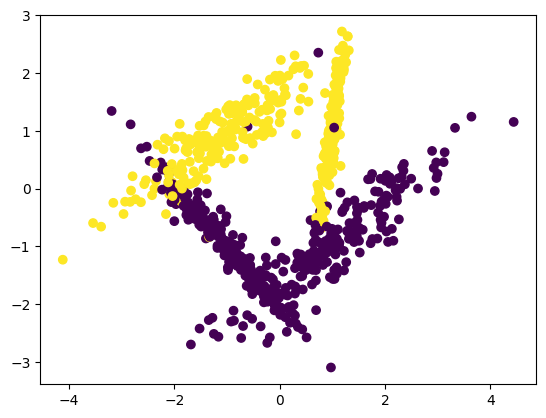

In [96]:
X,y=make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1111, n_clusters_per_class=2,n_samples=1000
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test =torch.from_numpy(y_test).long()

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

In [97]:
class DistributionClassifier(nn.Module):
    def __init__(self,input_features,hidden_features,output_features):
        super().__init__()
        self.linear = nn.Linear(input_features,hidden_features)
        self.linear2 = nn.Linear(hidden_features,hidden_features)
        self.linear3 = nn.Linear(hidden_features,hidden_features)
        self.linear4 = nn.Linear(hidden_features,hidden_features)
        self.linear5 = nn.Linear(hidden_features,hidden_features)
        self.linear6 = nn.Linear(hidden_features,output_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.linear6(self.relu(self.linear5(self.relu(self.linear4(self.relu(self.linear3(self.relu(self.linear2(self.relu(self.linear(x)))))))))))

In [98]:
model = DistributionClassifier(2,64,2)

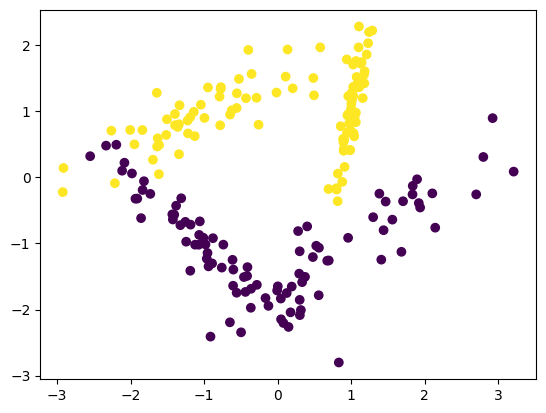

In [111]:
model.eval()
with torch.inference_mode():
    predictions = model(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=torch.argmax(predictions, dim=1))
plt.show()

In [100]:
def trainer(epochs, model, loss_fn, optimizer, X_train, y_train):
    for epoch in range(epochs):
        model.train()
        predictions = model(X_train)
        loss = loss_fn(predictions, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"{epoch} {loss}")

In [108]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
trainer(epochs=10000, model=model, loss_fn=loss_fn, optimizer=optimizer, X_train=X_train, y_train=y_train)

0 0.06846319884061813
100 0.06844758242368698
200 0.06817197054624557
300 0.06841596215963364
400 0.0681070014834404
500 0.06818579882383347
600 0.06819894909858704
700 0.0682099312543869
800 0.06771185994148254
900 0.06791859865188599
1000 0.06791473180055618
1100 0.0680350810289383
1200 0.06788311898708344
1300 0.06779923290014267
1400 0.06763879954814911
1500 0.0677177831530571
1600 0.06761255860328674
1700 0.06757354736328125
1800 0.06744691729545593
1900 0.06734011322259903
2000 0.06728415936231613
2100 0.06718213856220245
2200 0.06723270565271378
2300 0.06716416031122208
2400 0.06700887531042099
2500 0.06695941090583801
2600 0.06695260852575302
2700 0.06685389578342438
2800 0.06676085293292999
2900 0.06676138192415237
3000 0.06668952107429504
3100 0.06655028462409973
3200 0.06641782820224762
3300 0.06645476073026657
3400 0.06636247038841248
3500 0.0660935491323471
3600 0.06632272899150848
3700 0.06616899371147156
3800 0.06612838804721832
3900 0.0662398412823677
4000 0.06611668318